# {Exploratory Data Analysis for Stock data of (MSFT,AMZN,APPLE,IBM,TSLA) }
## By: Hadeel Sameh Hassan
#  

# MSFT Stock Data

In [1]:
import pandas as pd
MSFT_df=pd.read_csv('HistoricalData_MSFT.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# checking data and explore columns type

In [3]:
MSFT_df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$299.35,14998980,$298.23,$299.8,$296.93
1,09/23/2021,$299.56,18604600,$298.845,$300.9,$297.5339
2,09/22/2021,$298.58,26626340,$296.725,$300.22,$294.51
3,09/21/2021,$294.8,22364100,$295.69,$297.54,$294.07
4,09/20/2021,$294.3,38278660,$296.33,$298.72,$289.52


In [4]:
MSFT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
Date          127 non-null object
Close/Last    127 non-null object
Volume        127 non-null int64
Open          127 non-null object
High          127 non-null object
Low           127 non-null object
dtypes: int64(1), object(5)
memory usage: 6.1+ KB


#  Removing  " Dollar sign" from 'Close/Last','Open','High','Low' culomns

In [5]:

string_col=['Date','Close/Last','Open','High','Low']
for col in string_col:
    MSFT_df[col] = MSFT_df[col].map(lambda x: str(x).replace('$',''))

# Splitting "Date" cloumn into (day,month,and year) then, droping it and drop "year" column beacause our data is only 6months ,so year would not affect our model.

In [6]:
MSFT_df["day"] = MSFT_df['Date'].map(lambda x: pd.to_datetime(x).day)
MSFT_df["month"] = MSFT_df['Date'].map(lambda x: pd.to_datetime(x).month)
MSFT_df["year"] = MSFT_df['Date'].map(lambda x: pd.to_datetime(x).year)

In [7]:
MSFT_df = MSFT_df.drop(["Date","year"],axis =1 )

# converting columns types to numerical

In [8]:
string_2_float=['Close/Last','Open','High','Low']
MSFT_df['day'] = MSFT_df['day'].apply(int)
MSFT_df['month'] = MSFT_df['month'].apply(int)
for col in string_2_float:
    MSFT_df[col] = MSFT_df[col].apply(float)

### The result of data is : 

In [9]:
MSFT_df.head(5)

,Date,Close/Last,Volume,Open,High,Low,day,month
0,09/24/2021,299.35,14998980,298.230,299.80,296.9300,24,9
1,09/23/2021,299.56,18604600,298.845,300.90,297.5339,23,9
2,09/22/2021,298.58,26626340,296.725,300.22,294.5100,22,9
3,09/21/2021,294.80,22364100,295.690,297.54,294.0700,21,9
4,09/20/2021,294.30,38278660,296.330,298.72,289.5200,20,9


In [10]:
MSFT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 8 columns):
Date          127 non-null object
Close/Last    127 non-null float64
Volume        127 non-null int64
Open          127 non-null float64
High          127 non-null float64
Low           127 non-null float64
day           127 non-null int64
month         127 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 8.1+ KB


In [11]:
MSFT_df.describe()

,Close/Last,Volume,Open,High,Low,day,month
count,127.000000,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000
mean,271.102717,2.388144e+07,270.717260,272.744787,268.880279,16.047244,6.330709
std,21.105790,6.394271e+06,21.297217,21.111262,21.078022,8.739491,1.755061
min,231.850000,1.390017e+07,231.550000,233.850000,231.100000,1.000000,3.000000
25%,252.320000,1.953475e+07,251.959500,254.114500,250.785000,9.000000,5.000000
50%,266.690000,2.307917e+07,266.185000,267.850000,265.470000,16.000000,6.000000
75%,289.595000,2.622330e+07,288.995000,290.070000,287.132900,23.000000,8.000000
max,305.220000,4.690312e+07,305.020000,305.840000,302.003500,31.000000,9.000000


# Check if columns has missing values 

In [12]:
a=[]
a=MSFT_df.columns
for i in a:
    print(f'does column {i} has null values? {MSFT_df[i].isnull().any()}')


does column Date has null values? False
does column Close/Last has null values? False
does column Volume has null values? False
does column Open has null values? False
does column High has null values? False
does column Low has null values? False
does column day has null values? False
does column month has null values? False


## so,there is no NAN (missing values) in MSFT data

# Exploratory Data Analysis

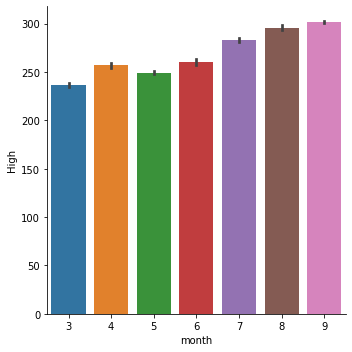

In [13]:
sns.catplot(x = "month", y = "High", data = MSFT_df, kind = "bar", height = 5)

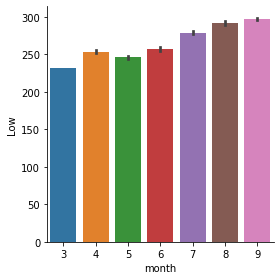

In [31]:
sns.catplot(x = "month", y = "Low", data = MSFT_df, kind = "bar", height = 4)

### adding column for deffernce between Openning and Closing

In [15]:
MSFT_df['close-open']=MSFT_df["Close/Last"]-MSFT_df["Open"]

## mean (Average) values over last 6 months

In [16]:
MSFT_df.groupby('month').mean()    

,Close/Last,Volume,Open,High,Low,day,close-open
month,,,,,,,
3,234.835000,2.978070e+07,233.643750,236.615000,231.730000,29.000000,1.191250
4,255.580000,2.708087e+07,254.699810,256.993995,253.231548,16.714286,0.880190
5,247.395500,2.475288e+07,247.689700,249.481500,245.737000,15.500000,-0.294200
6,259.018409,2.311692e+07,258.317727,260.356664,256.875195,15.318182,0.700682
7,281.502381,2.488996e+07,281.022667,283.025476,278.994395,16.571429,0.479714
8,294.314091,2.006029e+07,293.607545,295.776923,291.877605,15.954545,0.706545
9,299.455882,2.220446e+07,300.011471,301.597071,297.460529,13.235294,-0.555588


## Maximum 'High' Values in past 6 months

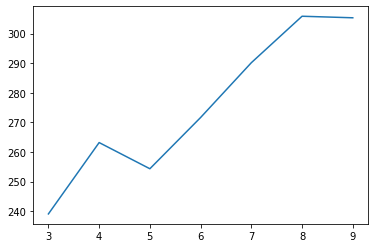

In [26]:
plt.plot(MSFT_df.groupby('month')['High'].max())

## minimum 'High' Values in past 6 months

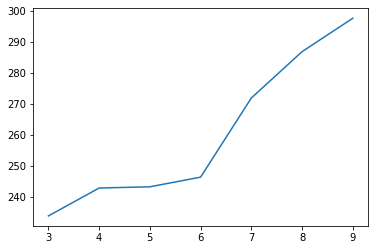

In [29]:
plt.plot(MSFT_df.groupby('month')['High'].min())

## Maximum 'Close/Last' Values in past 6 months

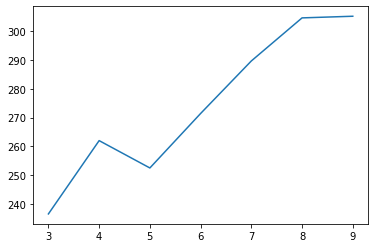

In [30]:
plt.plot(MSFT_df.groupby('month')['Close/Last'].max())

## Minmum 'Close/Last' Values in past 6 months

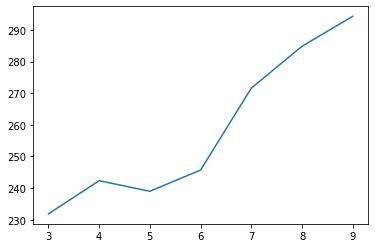

In [32]:
plt.plot(MSFT_df.groupby('month')['Close/Last'].min())

#   

# AMZN Stock Data

In [39]:
AMZN_df=pd.read_csv('HistoricalData_AMZN.csv')

# checking data and explore columns type

In [40]:
AMZN_df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$3425.52,2116241,$3402.01,$3429.26,$3393.4
1,09/23/2021,$3416,2379414,$3380.05,$3428.96,$3380.05
2,09/22/2021,$3380.05,2411403,$3351,$3389,$3341.05
3,09/21/2021,$3343.63,2780878,$3375,$3379.7,$3332.39
4,09/20/2021,$3355.73,4669130,$3396,$3419,$3305.01


In [41]:
AMZN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
Date          126 non-null object
Close/Last    126 non-null object
Volume        126 non-null int64
Open          126 non-null object
High          126 non-null object
Low           126 non-null object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


#  Removing  " Dollar sign" from 'Close/Last','Open','High','Low' culomns

In [42]:

string_col=['Date','Close/Last','Open','High','Low']
for col in string_col:
    AMZN_df[col] = AMZN_df[col].map(lambda x: str(x).replace('$',''))

# Splitting "Date" cloumn into (day,month,and year) then, droping it and drop "year" column beacause our data is only 6months ,so year would not affect our model.

In [43]:
AMZN_df["day"] = AMZN_df['Date'].map(lambda x: pd.to_datetime(x).day)
AMZN_df["month"] = AMZN_df['Date'].map(lambda x: pd.to_datetime(x).month)
AMZN_df["year"] = AMZN_df['Date'].map(lambda x: pd.to_datetime(x).year)

In [44]:
AMZN_df = AMZN_df.drop(["Date","year"],axis =1 )

# converting columns types to numerical

In [45]:
string_2_float=['Close/Last','Open','High','Low']
AMZN_df['day'] = AMZN_df['day'].apply(int)
AMZN_df['month'] = AMZN_df['month'].apply(int)
for col in string_2_float:
    AMZN_df[col] = AMZN_df[col].apply(float)

### The result of data is : 

In [46]:
AMZN_df.head(5)

,Close/Last,Volume,Open,High,Low,day,month
0,3425.52,2116241,3402.01,3429.26,3393.40,24,9
1,3416.00,2379414,3380.05,3428.96,3380.05,23,9
2,3380.05,2411403,3351.00,3389.00,3341.05,22,9
3,3343.63,2780878,3375.00,3379.70,3332.39,21,9
4,3355.73,4669130,3396.00,3419.00,3305.01,20,9


In [47]:
AMZN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Close/Last    126 non-null float64
Volume        126 non-null int64
Open          126 non-null float64
High          126 non-null float64
Low           126 non-null float64
day           126 non-null int64
month         126 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.0 KB


In [48]:
AMZN_df.describe()

,Close/Last,Volume,Open,High,Low,day,month
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000
mean,3381.898095,3.355987e+06,3381.396675,3410.380580,3351.344528,15.968254,6.357143
std,149.284062,1.251255e+06,151.039057,152.228518,145.894676,8.728745,1.736499
min,3055.290000,1.680306e+06,3055.439000,3073.000000,3028.445000,1.000000,3.000000
25%,3270.427500,2.476100e+06,3275.318250,3298.185000,3234.987500,9.000000,5.000000
50%,3369.125000,3.119550e+06,3364.212500,3389.000000,3332.920000,16.000000,6.000000
75%,3470.380000,3.784162e+06,3477.605000,3497.822500,3437.512800,23.000000,8.000000
max,3731.410000,9.965593e+06,3744.000000,3773.078200,3696.792900,31.000000,9.000000


# Check if columns has missing values 

In [49]:
a=[]
a=AMZN_df.columns
for i in a:
    print(f'does column {i} has null values? {AMZN_df[i].isnull().any()}')


does column Close/Last has null values? False
does column Volume has null values? False
does column Open has null values? False
does column High has null values? False
does column Low has null values? False
does column day has null values? False
does column month has null values? False


## so,there is no NAN (missing values) in AMZN data

# Exploratory Data Analysis

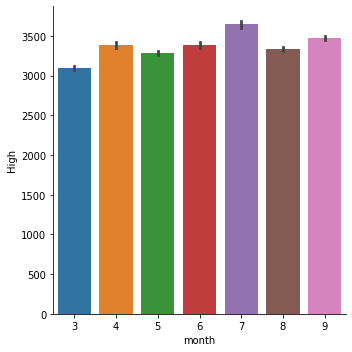

In [50]:
sns.catplot(x = "month", y = "High", data = AMZN_df, kind = "bar", height = 5)

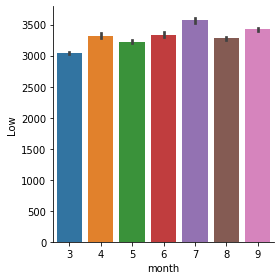

In [51]:
sns.catplot(x = "month", y = "Low", data = AMZN_df, kind = "bar", height = 4)

### adding column for deffernce between Openning and Closing

In [52]:
AMZN_df['close-open']=AMZN_df["Close/Last"]-AMZN_df["Open"]

## mean (Average) values over last 6 months

In [53]:
AMZN_df.groupby('month').mean()    

,Close/Last,Volume,Open,High,Low,day,close-open
month,,,,,,,
3,3075.033333,2.725822e+06,3063.169667,3094.526667,3041.648333,30.000000,11.863667
4,3352.174286,3.659218e+06,3347.732524,3383.686462,3320.005529,16.714286,4.441762
5,3246.260000,3.757665e+06,3261.308260,3285.698225,3221.329545,15.500000,-15.048260
6,3367.725455,3.045961e+06,3360.013409,3387.669795,3339.959995,15.318182,7.712045
7,3616.006190,3.987445e+06,3612.711048,3647.416852,3575.027781,16.571429,3.295143
8,3312.917727,2.857590e+06,3310.760682,3334.938486,3283.299818,15.954545,2.157045
9,3450.760000,2.886210e+06,3453.762459,3479.991576,3424.144659,13.235294,-3.002459


## Maximum 'High' Values in past 6 months

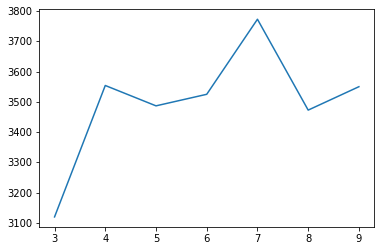

In [54]:
plt.plot(AMZN_df.groupby('month')['High'].max())

## minimum 'High' Values in past 6 months

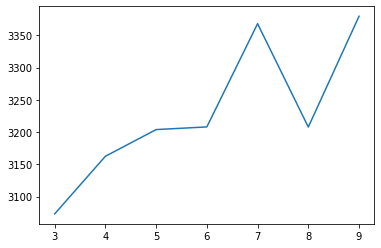

In [55]:
plt.plot(AMZN_df.groupby('month')['High'].min())

## Maximum 'Close/Last' Values in past 6 months

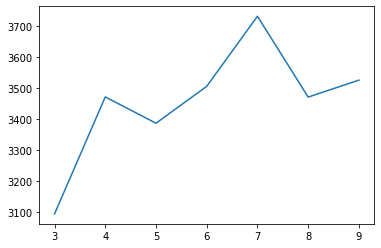

In [56]:
plt.plot(AMZN_df.groupby('month')['Close/Last'].max())

## Minmum 'Close/Last' Values in past 6 months

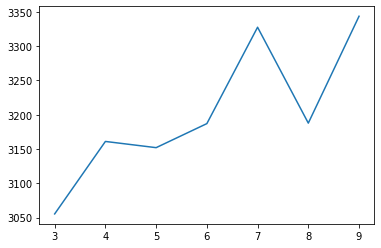

In [97]:
plt.plot(AMZN_df.groupby('month')['Close/Last'].min())

#   

# APPLE Stock Data

In [58]:
APPLE_df=pd.read_csv('HistoricalData_APPLE.csv')

# checking data and explore columns type

In [59]:
APPLE_df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$146.92,53477870,$145.66,$147.4701,$145.56
1,09/23/2021,$146.83,64838170,$146.65,$147.08,$145.64
2,09/22/2021,$145.85,76404340,$144.45,$146.43,$143.7001
3,09/21/2021,$143.43,75833960,$143.93,$144.6,$142.78
4,09/20/2021,$142.94,123478900,$143.8,$144.84,$141.27


In [60]:
APPLE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
Date          127 non-null object
Close/Last    127 non-null object
Volume        127 non-null int64
Open          127 non-null object
High          127 non-null object
Low           127 non-null object
dtypes: int64(1), object(5)
memory usage: 6.1+ KB


#  Removing  " Dollar sign" from 'Close/Last','Open','High','Low' culomns

In [61]:

string_col=['Date','Close/Last','Open','High','Low']
for col in string_col:
    APPLE_df[col] = APPLE_df[col].map(lambda x: str(x).replace('$',''))

# Splitting "Date" cloumn into (day,month,and year) then, droping it and drop "year" column beacause our data is only 6months ,so year would not affect our model.

In [62]:
APPLE_df["day"] = APPLE_df['Date'].map(lambda x: pd.to_datetime(x).day)
APPLE_df["month"] = APPLE_df['Date'].map(lambda x: pd.to_datetime(x).month)
APPLE_df["year"] = APPLE_df['Date'].map(lambda x: pd.to_datetime(x).year)

In [63]:
APPLE_df = APPLE_df.drop(["Date","year"],axis =1 )

# converting columns types to numerical

In [64]:
string_2_float=['Close/Last','Open','High','Low']
APPLE_df['day'] = APPLE_df['day'].apply(int)
APPLE_df['month'] = APPLE_df['month'].apply(int)
for col in string_2_float:
    APPLE_df[col] = APPLE_df[col].apply(float)

### The result of data is : 

In [65]:
APPLE_df.head(5)

,Close/Last,Volume,Open,High,Low,day,month
0,146.92,53477870,145.66,147.4701,145.5600,24,9
1,146.83,64838170,146.65,147.0800,145.6400,23,9
2,145.85,76404340,144.45,146.4300,143.7001,22,9
3,143.43,75833960,143.93,144.6000,142.7800,21,9
4,142.94,123478900,143.80,144.8400,141.2700,20,9


In [66]:
APPLE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
Close/Last    127 non-null float64
Volume        127 non-null int64
Open          127 non-null float64
High          127 non-null float64
Low           127 non-null float64
day           127 non-null int64
month         127 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.1 KB


In [67]:
APPLE_df.describe()

,Close/Last,Volume,Open,High,Low,day,month
count,127.000000,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000
mean,137.780669,8.205383e+07,137.647362,138.907427,136.510209,16.047244,6.330709
std,10.041910,2.144567e+07,10.122762,10.170515,9.950175,8.739491,1.755061
min,119.900000,4.639767e+07,120.110000,120.403100,118.860000,1.000000,3.000000
25%,127.875000,6.646044e+07,127.855000,129.645000,126.755000,9.000000,5.000000
50%,134.780000,7.875678e+07,135.010000,135.530000,133.640000,16.000000,6.000000
75%,146.815000,9.416772e+07,146.815000,148.120000,145.785000,23.000000,8.000000
max,156.690000,1.511010e+08,156.980000,157.260000,154.390000,31.000000,9.000000


# Check if columns has missing values 

In [68]:
a=[]
a=APPLE_df.columns
for i in a:
    print(f'does column {i} has null values? {APPLE_df[i].isnull().any()}')


does column Close/Last has null values? False
does column Volume has null values? False
does column Open has null values? False
does column High has null values? False
does column Low has null values? False
does column day has null values? False
does column month has null values? False


## so,there is no NAN (missing values) in APPLE data

# Exploratory Data Analysis

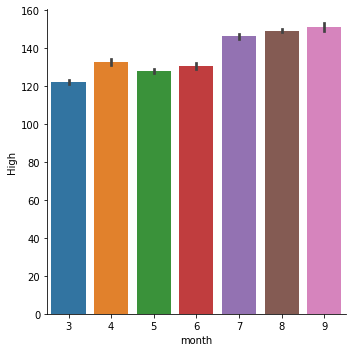

In [69]:
sns.catplot(x = "month", y = "High", data = APPLE_df, kind = "bar", height = 5)

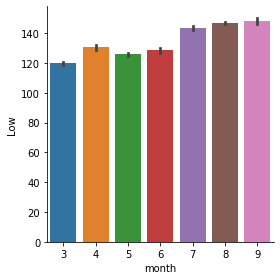

In [70]:
sns.catplot(x = "month", y = "Low", data = APPLE_df, kind = "bar", height = 4)

### adding column for deffernce between Openning and Closing

In [71]:
APPLE_df['close-open']=APPLE_df["Close/Last"]- APPLE_df["Open"]

## mean (Average) values over last 6 months

In [72]:
APPLE_df.groupby('month').mean()    

,Close/Last,Volume,Open,High,Low,day,close-open
month,,,,,,,
3,121.162500,9.472154e+07,120.940000,121.995775,119.914975,29.000000,0.222500
4,131.812619,8.999794e+07,131.672381,132.911433,130.464767,16.714286,0.140238
5,126.784000,8.559035e+07,127.034750,128.157655,125.823750,15.500000,-0.250750
6,129.958636,7.302682e+07,129.489545,130.651591,128.761509,15.318182,0.469091
7,145.139524,9.138705e+07,144.569762,146.252019,143.538200,16.571429,0.569762
8,148.177727,6.651373e+07,147.850682,149.226336,146.865455,15.954545,0.327045
9,149.577647,8.536274e+07,150.246471,151.197653,148.400359,13.235294,-0.668824


## Maximum 'High' Values in past 6 months

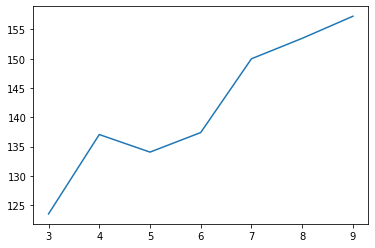

In [73]:
plt.plot(APPLE_df.groupby('month')['High'].max())

## minimum 'High' Values in past 6 months

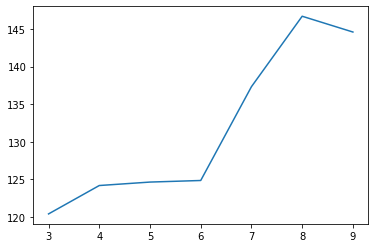

In [74]:
plt.plot(APPLE_df.groupby('month')['High'].min())

## Maximum 'Close/Last' Values in past 6 months

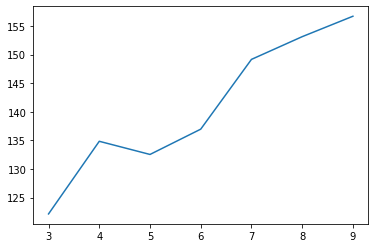

In [75]:
plt.plot(APPLE_df.groupby('month')['Close/Last'].max())

## Minmum 'Close/Last' Values in past 6 months

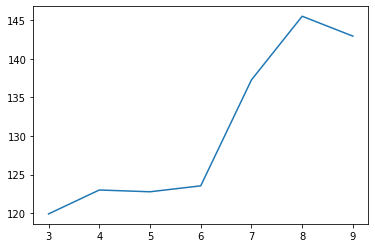

In [76]:
plt.plot(APPLE_df.groupby('month')['Close/Last'].min())

#   

#   

# IBM Stock Data

In [77]:
IBM_df=pd.read_csv('HistoricalData_IBM.csv')

# checking data and explore columns type

In [78]:
IBM_df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$137.49,2964397,$137.03,$138.48,$136.75
1,09/23/2021,$136.73,3013238,$135.25,$137.42,$135.03
2,09/22/2021,$134.63,3602416,$133.72,$135.37,$133.47
3,09/21/2021,$132.97,4074528,$135.11,$135.65,$132.94
4,09/20/2021,$134.31,4770651,$133.9,$135.18,$132.78


In [79]:
IBM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
Date          126 non-null object
Close/Last    126 non-null object
Volume        126 non-null int64
Open          126 non-null object
High          126 non-null object
Low           126 non-null object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


#  Removing  " Dollar sign" from 'Close/Last','Open','High','Low' culomns

In [80]:

string_col=['Date','Close/Last','Open','High','Low']
for col in string_col:
    IBM_df[col] = IBM_df[col].map(lambda x: str(x).replace('$',''))

# Splitting "Date" cloumn into (day,month,and year) then, droping it and drop "year" column beacause our data is only 6months ,so year would not affect our model.

In [81]:
IBM_df["day"] = IBM_df['Date'].map(lambda x: pd.to_datetime(x).day)
IBM_df["month"] = IBM_df['Date'].map(lambda x: pd.to_datetime(x).month)
IBM_df["year"] = IBM_df['Date'].map(lambda x: pd.to_datetime(x).year)

In [82]:
IBM_df = IBM_df.drop(["Date","year"],axis =1 )

# converting columns types to numerical

In [83]:
string_2_float=['Close/Last','Open','High','Low']
IBM_df['day'] = IBM_df['day'].apply(int)
IBM_df['month'] = IBM_df['month'].apply(int)
for col in string_2_float:
    IBM_df[col] = IBM_df[col].apply(float)

### The result of data is : 

In [85]:
IBM_df.head(5)

,Close/Last,Volume,Open,High,Low,day,month
0,137.49,2964397,137.03,138.48,136.75,24,9
1,136.73,3013238,135.25,137.42,135.03,23,9
2,134.63,3602416,133.72,135.37,133.47,22,9
3,132.97,4074528,135.11,135.65,132.94,21,9
4,134.31,4770651,133.90,135.18,132.78,20,9


In [86]:
IBM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Close/Last    126 non-null float64
Volume        126 non-null int64
Open          126 non-null float64
High          126 non-null float64
Low           126 non-null float64
day           126 non-null int64
month         126 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.0 KB


In [87]:
IBM_df.describe()

,Close/Last,Volume,Open,High,Low,day,month
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000
mean,141.347302,4.429673e+06,141.401151,142.417757,140.375849,15.968254,6.357143
std,4.423316,2.393538e+06,4.392897,4.440016,4.364116,8.728745,1.736499
min,131.180000,1.910443e+06,131.305000,132.780000,130.380000,1.000000,3.000000
25%,138.697500,3.048210e+06,138.472500,139.631250,137.566250,9.000000,5.000000
50%,141.470000,3.886453e+06,141.680000,143.030000,140.880500,16.000000,6.000000
75%,144.235000,4.767610e+06,144.470000,145.696750,143.610000,23.000000,8.000000
max,151.280000,1.682816e+07,151.470000,152.840000,150.370000,31.000000,9.000000


# Check if columns has missing values 

In [88]:
a=[]
a=IBM_df.columns
for i in a:
    print(f'does column {i} has null values? {IBM_df[i].isnull().any()}')


does column Close/Last has null values? False
does column Volume has null values? False
does column Open has null values? False
does column High has null values? False
does column Low has null values? False
does column day has null values? False
does column month has null values? False


## so,there is no NAN (missing values) in IBM data

# Exploratory Data Analysis

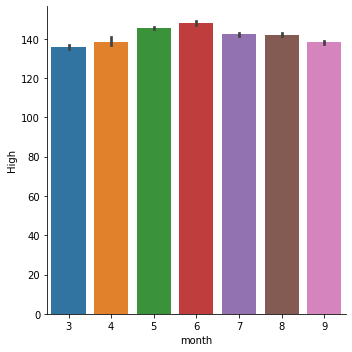

In [89]:
sns.catplot(x = "month", y = "High", data = IBM_df, kind = "bar", height = 5)

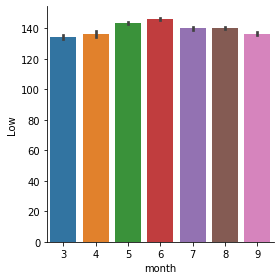

In [90]:
sns.catplot(x = "month", y = "Low", data = IBM_df, kind = "bar", height = 4)

### adding column for deffernce between Openning and Closing

In [91]:
IBM_df['close-open']=IBM_df["Close/Last"]-IBM_df["Open"]

## mean (Average) values over last 6 months

In [92]:
IBM_df.groupby('month').mean()    

,Close/Last,Volume,Open,High,Low,day,close-open
month,,,,,,,
3,134.613333,4.786115e+06,135.460000,136.016667,134.080000,30.000000,-0.846667
4,137.379524,5.853357e+06,137.165000,138.577852,136.149048,16.714286,0.214524
5,144.521000,4.832958e+06,144.349000,145.484670,143.476210,15.500000,0.172000
6,147.078636,3.838590e+06,147.050909,148.073409,146.046914,15.318182,0.027727
7,140.929048,5.268529e+06,141.336190,142.211424,139.929176,16.571429,-0.407143
8,141.161364,3.167661e+06,141.120000,141.980659,140.328709,15.954545,0.041364
9,137.043529,3.495536e+06,137.347059,138.184100,136.334494,13.235294,-0.303529


## Maximum 'High' Values in past 6 months

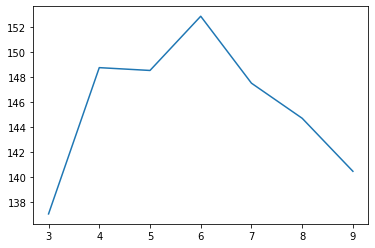

In [93]:
plt.plot(IBM_df.groupby('month')['High'].max())

## minimum 'High' Values in past 6 months

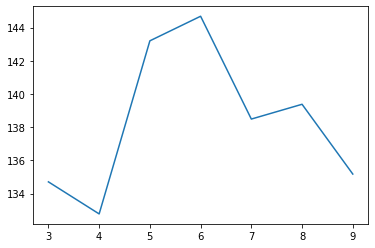

In [94]:
plt.plot(IBM_df.groupby('month')['High'].min())

## Maximum 'Close/Last' Values in past 6 months

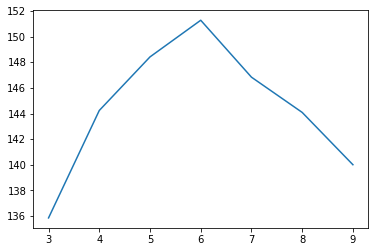

In [95]:
plt.plot(IBM_df.groupby('month')['Close/Last'].max())

## Minmum 'Close/Last' Values in past 6 months

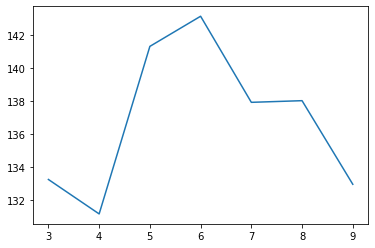

In [96]:
plt.plot(IBM_df.groupby('month')['Close/Last'].min())

#   

#    

# TSLA Stock Data

In [98]:
TSLA_df=pd.read_csv('HistoricalData_TSLA.csv')

# checking data and explore columns type

In [99]:
TSLA_df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$774.39,21373020,$745.89,$774.8,$744.56
1,09/23/2021,$753.64,11947530,$755,$758.2,$747.92
2,09/22/2021,$751.94,15126270,$743.5263,$753.6699,$739.12
3,09/21/2021,$739.38,16330720,$734.79,$744.7399,$730.44
4,09/20/2021,$730.17,24757650,$734.5577,$742,$718.6249


In [100]:
TSLA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
Date          126 non-null object
Close/Last    126 non-null object
Volume        126 non-null int64
Open          126 non-null object
High          126 non-null object
Low           126 non-null object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


#  Removing  " Dollar sign" from 'Close/Last','Open','High','Low' culomns

In [101]:

string_col=['Date','Close/Last','Open','High','Low']
for col in string_col:
    TSLA_df[col] = TSLA_df[col].map(lambda x: str(x).replace('$',''))

# Splitting "Date" cloumn into (day,month,and year) then, droping it and drop "year" column beacause our data is only 6months ,so year would not affect our model.

In [102]:
TSLA_df["day"] = TSLA_df['Date'].map(lambda x: pd.to_datetime(x).day)
TSLA_df["month"] = TSLA_df['Date'].map(lambda x: pd.to_datetime(x).month)
TSLA_df["year"] = TSLA_df['Date'].map(lambda x: pd.to_datetime(x).year)

In [103]:
TSLA_df = TSLA_df.drop(["Date","year"],axis =1 )

# converting columns types to numerical

In [104]:
string_2_float=['Close/Last','Open','High','Low']
TSLA_df['day'] = TSLA_df['day'].apply(int)
TSLA_df['month'] = TSLA_df['month'].apply(int)
for col in string_2_float:
    TSLA_df[col] = TSLA_df[col].apply(float)

### The result of data is : 

In [105]:
TSLA_df.head(5)

,Close/Last,Volume,Open,High,Low,day,month
0,774.39,21373020,745.8900,774.8000,744.5600,24,9
1,753.64,11947530,755.0000,758.2000,747.9200,23,9
2,751.94,15126270,743.5263,753.6699,739.1200,22,9
3,739.38,16330720,734.7900,744.7399,730.4400,21,9
4,730.17,24757650,734.5577,742.0000,718.6249,20,9


In [106]:
TSLA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Close/Last    126 non-null float64
Volume        126 non-null int64
Open          126 non-null float64
High          126 non-null float64
Low           126 non-null float64
day           126 non-null int64
month         126 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.0 KB


In [107]:
TSLA_df.describe()

,Close/Last,Volume,Open,High,Low,day,month
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000
mean,674.671270,2.423235e+07,674.011193,685.613536,662.674837,15.968254,6.357143
std,52.448037,8.535515e+06,52.422448,51.627427,52.663529,8.728745,1.736499
min,563.460000,9.800558e+06,552.550000,566.210000,546.980000,1.000000,3.000000
25%,632.042500,1.745640e+07,628.402500,640.044975,620.735000,9.000000,5.000000
50%,677.635000,2.286290e+07,679.375000,691.754950,668.170100,16.000000,6.000000
75%,714.412500,2.936167e+07,713.670000,724.675000,704.157500,23.000000,8.000000
max,774.390000,4.901743e+07,770.700000,780.790000,751.630100,31.000000,9.000000


# Check if columns has missing values 

In [108]:
a=[]
a=TSLA_df.columns
for i in a:
    print(f'does column {i} has null values? {TSLA_df[i].isnull().any()}')


does column Close/Last has null values? False
does column Volume has null values? False
does column Open has null values? False
does column High has null values? False
does column Low has null values? False
does column day has null values? False
does column month has null values? False


## so,there is no NAN (missing values) in TSLA data

# Exploratory Data Analysis

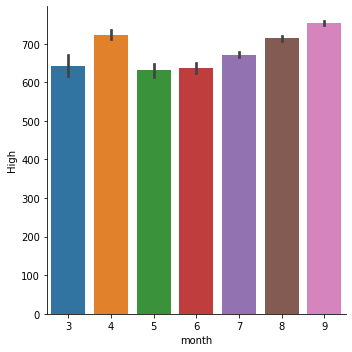

In [109]:
sns.catplot(x = "month", y = "High", data = TSLA_df, kind = "bar", height = 5)

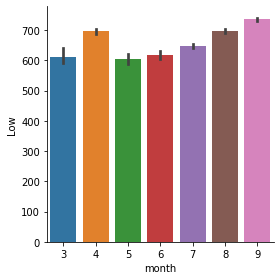

In [110]:
sns.catplot(x = "month", y = "Low", data = TSLA_df, kind = "bar", height = 4)

### adding column for deffernce between Openning and Closing

In [111]:
TSLA_df['close-open']=TSLA_df["Close/Last"]-TSLA_df["Open"]

## mean (Average) values over last 6 months

In [112]:
TSLA_df.groupby('month').mean()    

,Close/Last,Volume,Open,High,Low,day,close-open
month,,,,,,,
3,638.280000,3.380221e+07,621.336667,642.046667,609.380000,30.000000,16.943333
4,709.618095,3.231352e+07,709.282857,723.755248,695.203605,16.714286,0.335238
5,616.753000,3.125167e+07,618.718400,630.836585,604.396305,15.500000,-1.965400
6,626.919545,2.363281e+07,626.255818,637.298323,617.057732,15.318182,0.663727
7,659.134762,2.135680e+07,659.522967,670.919571,647.039924,16.571429,-0.388205
8,705.243182,1.736242e+07,704.433409,714.541350,695.659123,15.954545,0.809773
9,747.487647,1.752145e+07,745.114529,753.869988,736.122265,13.235294,2.373118


## Maximum 'High' Values in past 6 months

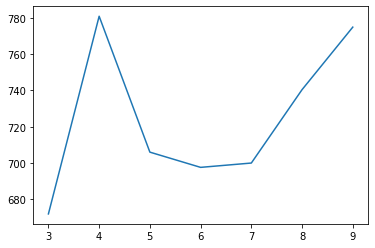

In [113]:
plt.plot(TSLA_df.groupby('month')['High'].max())

## minimum 'High' Values in past 6 months

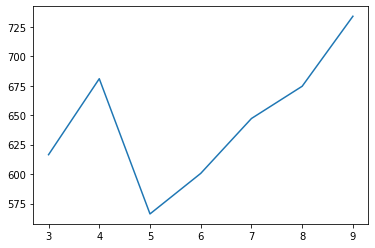

In [114]:
plt.plot(TSLA_df.groupby('month')['High'].min())

## Maximum 'Close/Last' Values in past 6 months

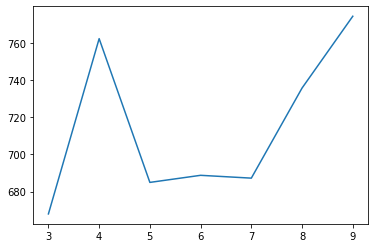

In [115]:
plt.plot(TSLA_df.groupby('month')['Close/Last'].max())

## Minmum 'Close/Last' Values in past 6 months

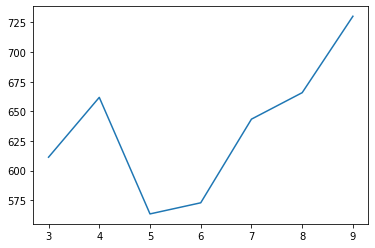

In [116]:
plt.plot(TSLA_df.groupby('month')['Close/Last'].min())

#   